In [1]:
# Dependencies
import pandas as pd
from datetime import datetime,date
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
# O'hare weather dataframe - Documentation available at https://openweathermap.org/history#historybulk
# Temepratures are measured in Farenheit

# Data file path to weather
file = "Sources\history_bulk.csv"

# Read our weather data into pandas
df = pd.read_csv(file)


df.columns  # Check name of columns
# df.dtypes # Check column data type

Index(['dt', 'dt_iso', 'timezone', 'city_name', 'lat', 'lon', 'temp',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'sea_level',
       'grnd_level', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h',
       'rain_3h', 'snow_1h', 'snow_3h', 'clouds_all', 'weather_id',
       'weather_main', 'weather_description', 'weather_icon'],
      dtype='object')

# O'hare Weather Dataframe

In [3]:
# Create weather dataframe
weather_df=pd.DataFrame([])


# Create O'hare weather dataframe 
weather_df['Date']=df['dt_iso']
#-----------Format object to datetime--------------------------
weather_df['Date']=weather_df['Date'].str.slice(0, -18) # Remove trailing characters from datetime object
weather_df['Date'] = pd.to_datetime(weather_df['Date'], errors='coerce') # convert object to datetime
# Format to mm-dd-yy
weather_df['Date'] =  weather_df["Date"].dt.strftime("%m/%d/%y") 
#--------------------------------------------------------------- 
weather_df['Temp']=df['temp']
weather_df['Temp Min']=df['temp_min']
weather_df['Temp Max']=df['temp_max']
weather_df['Pressure']=df['pressure']
weather_df['Humidity']=df['humidity']
weather_df['Wind Speed']=df['wind_speed']
weather_df['Clouds']=df['clouds_all']
weather_df['Weather Condition']=df['weather_main'] # Main weather condition
weather_df['Weather Descr']=df['weather_description'] # Main weather condition description

weather_df

,Date,Temp,Temp Min,Temp Max,Pressure,Humidity,Wind Speed,Clouds,Weather Condition,Weather Descr
0,01/01/17,31.44,30.20,33.80,1011,60,11.41,20,Clouds,few clouds
1,01/01/17,29.93,28.04,32.00,1012,69,6.91,1,Clear,sky is clear
2,01/01/17,28.38,26.60,30.38,1012,74,4.61,1,Clear,sky is clear
3,01/01/17,27.55,26.06,30.20,1013,74,5.75,1,Clear,sky is clear
4,01/01/17,27.05,26.06,28.63,1014,74,6.91,1,Clear,sky is clear
...,...,...,...,...,...,...,...,...,...,...
28048,12/31/19,26.87,26.01,28.40,1006,73,10.29,90,Clouds,overcast clouds
28049,12/31/19,26.91,26.01,28.99,1006,73,16.11,90,Clouds,overcast clouds
28050,12/31/19,26.85,26.01,28.80,1007,73,14.99,90,Clouds,overcast clouds
28051,12/31/19,27.09,26.01,28.99,1007,73,17.22,90,Clouds,overcast clouds


In [4]:
# Create weather_data df
weather_data=pd.DataFrame(weather_df, columns =['Date','Temp','Temp Min','Temp Max','Pressure','Humidity','Wind Speed',
                                       'Clouds'])
# Sort Date
weather_data.sort_values(by='Date', ascending=False)


# Daily averages, min and max
temp_avg = weather_data.groupby('Date')['Temp'].mean()
temp_min = weather_data.groupby('Date')['Temp Min'].min()
temp_max = weather_data.groupby('Date')['Temp Max'].max()
pressure_avg = weather_data.groupby('Date')['Pressure'].mean()
humidity_avg = weather_data.groupby('Date')['Humidity'].mean()
wind_avg = weather_data.groupby('Date')['Wind Speed'].mean()
clouds_avg = weather_data.groupby('Date')['Clouds'].mean()


# #Summar Weather Table
summary_weather_df = pd.DataFrame({  
                                     "Avg Temp": round(temp_avg,2), # Daily temperature average - FarenheitS  
                                     "Temp Min": temp_min,  # Daily minimum temperature - Farenheit 
                                     "Temp Max": temp_max,  # Daily maximum temperature - Farenheit 
                                     "Pressure":round(pressure_avg,2), # Atmospheric pressure (on the sea level, if there is no sea_level or grnd_level data), hPa
                                     "Humidity %": round(humidity_avg),  # Humidity %
                                     "Wind Speed":round(wind_avg,2),   # Wind speed meter/sec.
                                     "Clouds %": round(clouds_avg,2),    # Cloudiness %
                                
                                 })

summary_weather_df
           
    

,Avg Temp,Temp Min,Temp Max,Pressure,Humidity %,Wind Speed,Clouds %
Date,,,,,,,
01/01/17,28.11,17.60,39.92,1017.33,72.0,6.04,13.54
01/01/18,-1.19,-9.41,10.40,1038.62,59.0,11.98,12.25
01/01/19,31.90,25.00,39.20,1015.61,92.0,10.31,90.00
01/02/17,34.45,23.00,40.46,1018.96,81.0,6.36,60.89
01/02/18,-1.96,-11.96,10.94,1036.00,63.0,9.17,14.67
...,...,...,...,...,...,...,...
12/30/18,26.52,17.60,37.99,1017.30,77.0,11.47,55.74
12/30/19,38.03,28.00,55.00,996.23,85.0,13.54,90.00
12/31/17,4.39,-3.93,14.19,1032.79,60.0,10.31,62.29


# Cleaning up weather dataframe

In [5]:
# Create dataframe to hold unique dates
d=weather_df.groupby(['Date']).groups.keys()
date_column_df = pd.DataFrame(d)
date_column_df.columns  =["Date"]

# Merged daily summary with unique date to create a date dataframe
merged_weather_df = pd.merge(date_column_df, summary_weather_df, on="Date", how="left")

merged_weather_df


,Date,Avg Temp,Temp Min,Temp Max,Pressure,Humidity %,Wind Speed,Clouds %
0,01/01/17,28.11,17.60,39.92,1017.33,72.0,6.04,13.54
1,01/01/18,-1.19,-9.41,10.40,1038.62,59.0,11.98,12.25
2,01/01/19,31.90,25.00,39.20,1015.61,92.0,10.31,90.00
3,01/02/17,34.45,23.00,40.46,1018.96,81.0,6.36,60.89
4,01/02/18,-1.96,-11.96,10.94,1036.00,63.0,9.17,14.67
...,...,...,...,...,...,...,...,...
1090,12/30/18,26.52,17.60,37.99,1017.30,77.0,11.47,55.74
1091,12/30/19,38.03,28.00,55.00,996.23,85.0,13.54,90.00
1092,12/31/17,4.39,-3.93,14.19,1032.79,60.0,10.31,62.29
1093,12/31/18,35.62,30.00,39.99,1006.53,92.0,8.73,84.41


In [6]:
#========================== Create dataframe to flag daily weather conditions (Starts here)==============================

# Create temporary df to hold different weather conditions
temp = pd.DataFrame(weather_df)  
# Find each condition
temp["Clouds"]=(weather_df["Weather Condition"]=="Clouds")
temp["Drizzle"]=(weather_df["Weather Condition"]=="Drizzle")
temp["Fog"]=(weather_df["Weather Condition"]=="Fog")
temp["Mist"]=(weather_df["Weather Condition"]=="Mist")
temp["Rain"]=(weather_df["Weather Condition"]=="Rain")
temp["Snow"]=(weather_df["Weather Condition"]=="Snow")
temp["Thunderstorm"]=(weather_df["Weather Condition"]=="Thunderstorm")

# Convert True to 1 and False to 0
temp.Clouds = temp.Clouds.astype(int)
temp.Drizzle = temp.Drizzle.astype(int)
temp.Fog = temp.Fog.astype(int)
temp.Mist = temp.Mist.astype(int)
temp.Rain = temp.Rain.astype(int)
temp.Snow = temp.Snow.astype(int)
temp.Thunderstorm = temp.Thunderstorm.astype(int)

# Group condition by date, sum
t_cloud = temp.groupby('Date')['Clouds'].sum()
t_drizzle = temp.groupby('Date')['Drizzle'].sum()
t_fog = temp.groupby('Date')['Fog'].sum()
t_mist = temp.groupby('Date')['Mist'].sum()
t_rain = temp.groupby('Date')['Rain'].sum()
t_snow = temp.groupby('Date')['Snow'].sum()
t_thunderstorm = temp.groupby('Date')['Thunderstorm'].sum()


# Create dataframe to hold group and condition sum
t_df = pd.DataFrame({  'Clouds': t_cloud,
                       'Drizzle': t_drizzle,
                        'Fog': t_fog,
                        'Mist': t_mist, 
                        'Rain': t_rain,
                        'Snow': t_snow,
                         'Thunderstorm': t_thunderstorm
                    })


# t_df.head()

In [7]:
#Create another df for condition comparison 
t2df=pd.DataFrame(columns=["Clouds","Drizzle","Fog","Mist","Rain","Snow","Thunderstorm"])

# if the sum of each condition is greater than zero, condition flagged in t2df
t2df["Clouds"]=(t_df["Clouds"]>0)
t2df.Clouds = t2df.Clouds.astype(int)

t2df["Drizzle"]=(t_df["Drizzle"]>0)
t2df.Drizzle = t2df.Drizzle.astype(int)

t2df["Fog"]=(t_df["Fog"]>0)
t2df.Fog = t2df.Fog.astype(int)
                                   
t2df["Mist"]=(t_df["Mist"]>0)
t2df.Mist = t2df.Mist.astype(int)
 
t2df["Rain"]=(t_df["Rain"]>0)
t2df.Rain = t2df.Rain.astype(int)

t2df["Snow"]=(t_df["Snow"]>0)
t2df.Snow = t2df.Snow.astype(int)
 
t2df["Thunderstorm"]=(t_df["Thunderstorm"]>0)
t2df.Thunderstorm = t2df.Thunderstorm.astype(int)

t2df=t2df[["Drizzle","Fog","Mist","Rain","Snow","Thunderstorm","Clouds"]]


#========================== Create dataframe to flag daily weather conditions (Ends here)==============================



# Final Weather Dataframe

In [8]:
# Merged t2df(weather conditions) with merged_weather_df(avg temp, temp min, temp max..)
final_weather_df = pd.merge(merged_weather_df,t2df, on="Date", how="left")
final_weather_df['Date'] = final_weather_df['Date'].astype('datetime64[ns]') #Formate date object to datetime

final_weather_df.head()



,Date,Avg Temp,Temp Min,Temp Max,Pressure,Humidity %,Wind Speed,Clouds %,Drizzle,Fog,Mist,Rain,Snow,Thunderstorm,Clouds
0,2017-01-01,28.11,17.60,39.92,1017.33,72.0,6.04,13.54,0,0,0,0,0,0,1
1,2018-01-01,-1.19,-9.41,10.40,1038.62,59.0,11.98,12.25,0,0,0,0,0,0,1
2,2019-01-01,31.90,25.00,39.20,1015.61,92.0,10.31,90.00,0,0,1,1,1,0,1
3,2017-01-02,34.45,23.00,40.46,1018.96,81.0,6.36,60.89,1,0,1,1,0,0,1
4,2018-01-02,-1.96,-11.96,10.94,1036.00,63.0,9.17,14.67,0,0,0,0,0,0,1


# Flights Dataframe

In [19]:
# Data file path to flights 
flights_file = "Sources\Flights.csv"

# Read our flights dat into pandas
flights_data = pd.read_csv(flights_file)

flights_data.columns
#flights_df.head()

Index(['Carrier Code', 'Date', 'Flight Number', 'Tail Number',
       'Destination Airport', 'Scheduled departure time',
       'Actual departure time', 'Actual elapsed time (Minutes)',
       'Departure delay (Minutes)', 'Delay Carrier (Minutes)',
       'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)',
       'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)',
       'Unnamed: 14'],
      dtype='object')

In [20]:
#-----------Flights Data Frame----------------------------------------------------
flights_df=pd.DataFrame([])

flights_df['Carrier Code']= flights_data['Carrier Code']
#-----------------------------Format flights date object to datetime (start)----------------------------
flights_df['Date'] = flights_data['Date'].astype('datetime64[ns]')
#-----------------------------Format flight date object to datetime (end)----------------
flights_df['Flight Number']= flights_data['Flight Number']
flights_df['Tail Number']= flights_data['Tail Number']
flights_df['Dest Airport']= flights_data['Destination Airport']
flights_df['Scheduled departure time']= flights_data['Scheduled departure time']
flights_df['Actual departure time']= flights_data['Actual departure time']
flights_df['Actual elapsed time (Minutes)']= flights_data['Actual elapsed time (Minutes)']
flights_df['Departure delay (Minutes)']= flights_data['Departure delay (Minutes)']
flights_df['Delay Carrier (Minutes)']= flights_data['Delay Carrier (Minutes)']
flights_df['Delay Weather (Minutes)']= flights_data['Delay Weather (Minutes)']
flights_df['Delay National Aviation System (Minutes)']= flights_data['Delay National Aviation System (Minutes)']
flights_df['Delay Security (Minutes)']= flights_data['Delay Security (Minutes)']
flights_df['Delay Late Aircraft Arrival (Minutes)']= flights_data['Delay Late Aircraft Arrival (Minutes)']

# flights_df
# flights_df.dtypes
#final_weather_df.dtypes

# Merge Dataframes

In [21]:
# Merge weather and flights data frame
master_df = pd.merge(flights_df, final_weather_df, on="Date")
master_df


,Carrier Code,Date,Flight Number,Tail Number,Dest Airport,Scheduled departure time,Actual departure time,Actual elapsed time (Minutes),Departure delay (Minutes),Delay Carrier (Minutes),...,Humidity %,Wind Speed,Clouds %,Drizzle,Fog,Mist,Rain,Snow,Thunderstorm,Clouds
0,AA,2017-01-01,2201,N439AA,STL,21:50,21:45,66,0,0,...,72.0,6.04,13.54,0,0,0,0,0,0,1
1,AA,2017-01-01,2474,N4YNAA,MSP,21:50,23:21,73,91,7,...,72.0,6.04,13.54,0,0,0,0,0,0,1
2,AA,2017-01-01,2619,N867AA,LAX,21:50,21:45,269,0,0,...,72.0,6.04,13.54,0,0,0,0,0,0,1
3,AA,2017-01-01,437,N982AA,PHL,20:40,20:36,107,0,0,...,72.0,6.04,13.54,0,0,0,0,0,0,1
4,AA,2017-01-01,348,N3NLAA,LGA,20:35,20:33,109,0,0,...,72.0,6.04,13.54,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452850,UA,2019-12-31,1142,N818UA,BDL,6:00,6:00,135,0,0,...,79.0,17.78,90.33,0,0,1,0,1,0,1
452851,UA,2019-12-31,1155,N845UA,ATL,6:00,6:08,121,8,0,...,79.0,17.78,90.33,0,0,1,0,1,0,1
452852,UA,2019-12-31,1477,N27477,FLL,6:00,6:11,183,11,0,...,79.0,17.78,90.33,0,0,1,0,1,0,1
452853,UA,2019-12-31,2043,N69838,IAH,6:00,5:59,158,0,0,...,79.0,17.78,90.33,0,0,1,0,1,0,1


# Analysis and Plotting

In [25]:
# On-Time vs Delayed Flighst base on Seasonality in 2019
# Append Year to master dataframe
master_df["Year"] = pd.DatetimeIndex(master_df["Date"]).year
# Append Month to master dataframe
master_df["Month"] = pd.DatetimeIndex(master_df["Date"]).month

# Create a data frame to hold 2019 records
flight_2019=pd.DataFrame([])
flight_2019 = master_df.loc[master_df['Year']==2019]
flight_2019.head()

# Create a data frame based on delayed or on-time condition by months
flight_status=pd.DataFrame([])
flight_status["Month"]= flight_2019['Date'].dt.strftime('%b')
flight_status["Delayed"] = flight_2019["Departure delay (Minutes)"] != 0
flight_status["On-Time"] = flight_2019["Departure delay (Minutes)"] == 0

# Convert boolean True/False to 0 or 1
flight_status["Delayed"] =  flight_status["Delayed"].astype(int)
flight_status["On-Time"] = flight_status["On-Time"].astype(int)


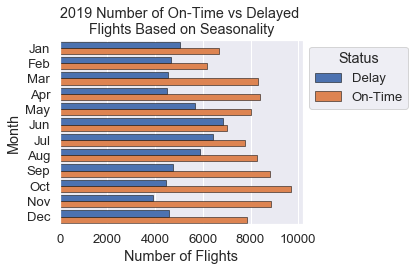

In [26]:
sns.set_style("dark") # Set seaborn - dark background
sns.set(font_scale=1.2) #set seaborn - font size
# plot flight_status data for delay vs on-time by month
p = sns.countplot(data=flight_status, y = 'Month', hue = 'On-Time',saturation=9, palette="deep",edgecolor=(0,0,0),linewidth=0.5)
# Set and format x label and title
p.set(xlabel='Number of Flights', title='2019 Number of On-Time vs Delayed \nFlights Based on Seasonality')
# Rename legend labels and relocation box
p.legend(title='Status',labels=['Delay','On-Time'], bbox_to_anchor=(1,1))

plt.tight_layout() # to fit bbox in to png
plt.savefig("2019 Number of On-Time vs Delayed Flights Seasonality.png") # save as png

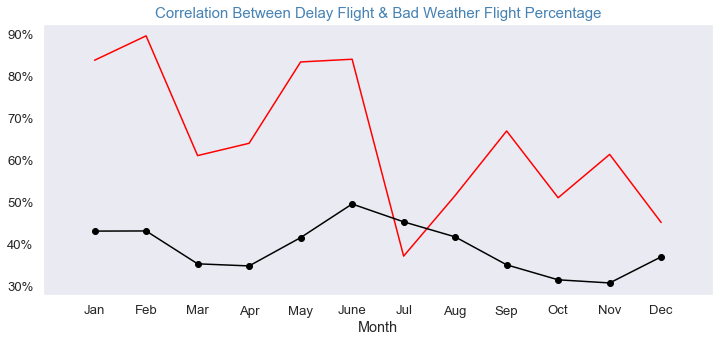

In [27]:
# On-Time vs Delayed Flighst base on Seasonality in 2019
# Append Year to master dataframe

# Combine all weather conditions to check for non-clear sky for each flight
weathermeasure = master_df.Rain+master_df.Drizzle+master_df.Fog+master_df.Mist+master_df.Snow+master_df.Thunderstorm

# Create a data frame to hold 2019 records
xflight_2019=pd.DataFrame([])
xflight_2019 = master_df.loc[master_df['Year']==2019]


# Create a data frame based on delayed or on-time condition by months & format
xflight_status=pd.DataFrame([])
xflight_status['Month']  = xflight_2019['Date'].dt.month 


# Get delay flights and bad weather measure; flag and convert to int  
xflight_status["Delayed"] = xflight_2019["Departure delay (Minutes)"] != 0
xflight_status["WeatherMeasure"]=weathermeasure
xflight_status["Delayed"] =  xflight_status["Delayed"].astype(int)
xflight_status["BadWeather"] = xflight_status['WeatherMeasure'] != 0
xflight_status["BadWeather"] =  xflight_status["BadWeather"].astype(int)

# Plot number of flights flying in undisirable weather percentage and number of delayed flights percentage
badweather_plt = xflight_status.groupby('Month')['BadWeather'].mean().plot(kind='line',grid=False, color='Red',figsize=(12,5))
delayed_plt =xflight_status.groupby('Month')['Delayed'].mean().plot(kind='line',color='Black', marker = 'o', grid=False,figsize=(12,5))

# Display y axis as percentage format
delayed_plt.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
badweather_plt.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

# Format x axis ticks label
positions=(1,2,3,4,5,6,7,8,9,10,11,12)
labels =["Jan","Feb","Mar","Apr","May","June","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.xticks(positions,labels)

# Format title    
plt.title('Correlation Between Delay Flight & Bad Weather Flight Percentage', fontsize='15', color='steelblue') # Format title

plt.xlim(0,13)

#plt.tight_layout()
plt.savefig("Correlation Between Delay Flights and Flying in Bad Condition") # save as png
plt.show()

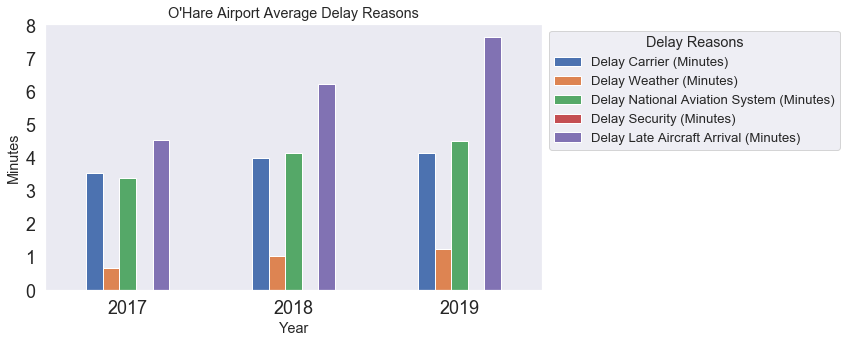

In [28]:
# Delay reason by group and year, plotting average delayed minutes 
p=master_df.groupby("Year")['Delay Carrier (Minutes)', 'Delay Weather (Minutes)',
       'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)',
       'Delay Late Aircraft Arrival (Minutes)'].mean().plot(kind='bar',
        title="O'Hare Airport Average Delay Reasons",fontsize='18',grid=False,figsize=(12,5),rot=0)

#set legend location and title
p.legend(title='Delay Reasons',bbox_to_anchor=(1,1))
p.set(ylabel='Minutes') #set y label name

plt.tight_layout() # to fit bbox in to png
plt.savefig("Ohare Airport Average Delay Reasons.png") # save as png


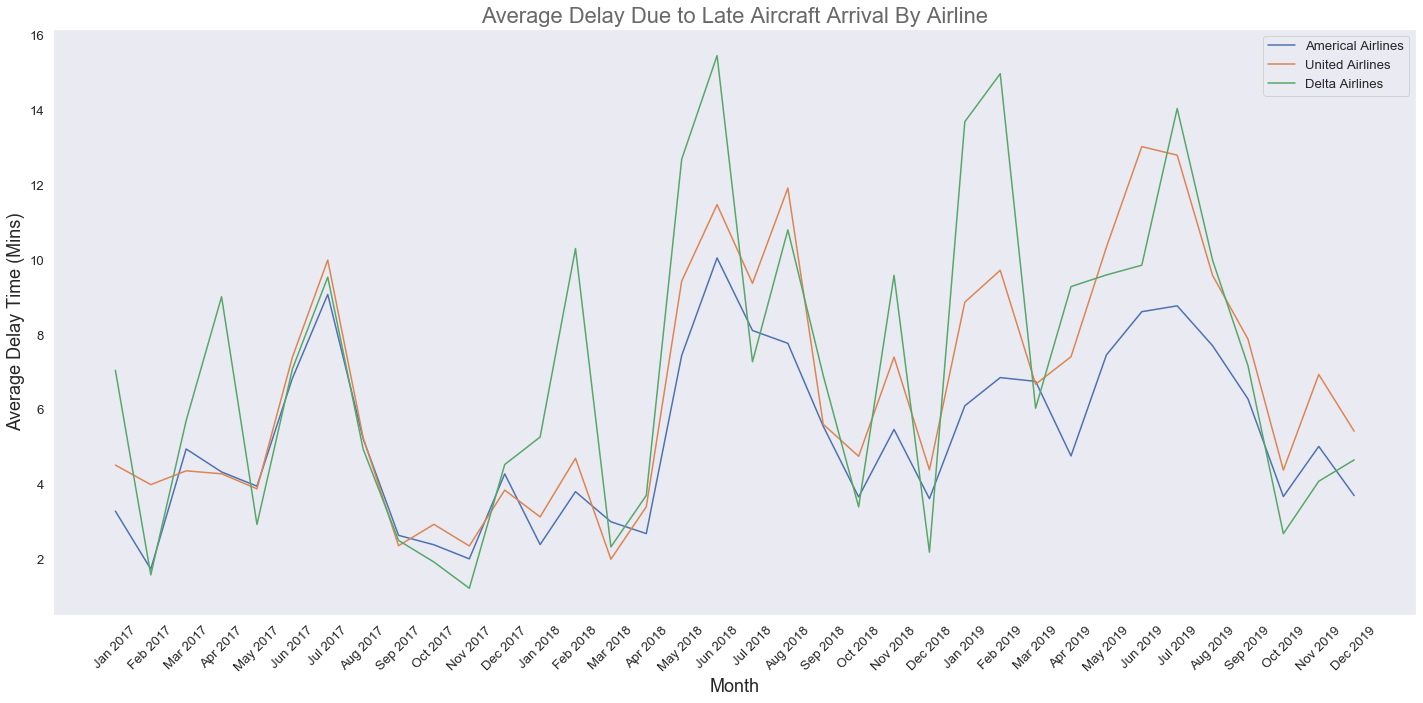

In [29]:
# Average delayed due to Delay Late Aircraft Arrival
master_df['Date'] = pd.to_datetime(master_df['Date'])
master_df['Date_formatted'] =master_df['Date'].dt.strftime('%b %Y').astype(str)
master_df_means=master_df.groupby(['Date_formatted', 'Carrier Code']).mean()


master_df_means = master_df_means.reset_index()
# Format Date to month-year
master_df_means['date_python'] = master_df_means['Date_formatted'].apply(lambda x: pd.datetime.strptime(x, '%b %Y'))
# Sort date
master_df_means = master_df_means.sort_values(by='date_python')

plt.figure(figsize=(20,10))

# Get unique date value
x = master_df_means['Date_formatted'].unique()

# Plot "Delay Late Aircraft Arrival" condition by carrier
y1 = master_df_means[master_df_means['Carrier Code'] == 'AA']['Delay Late Aircraft Arrival (Minutes)']
plt.plot(x, y1, label = "Americal Airlines")
y2 = master_df_means[master_df_means['Carrier Code'] == 'UA']['Delay Late Aircraft Arrival (Minutes)']
plt.plot(x, y2, label = "United Airlines")
y3 = master_df_means[master_df_means['Carrier Code'] == 'DL']['Delay Late Aircraft Arrival (Minutes)']
plt.plot(x, y3, label = "Delta Airlines")
plt.grid(linewidth=0) # To hid grid lines
# Set labels
plt.xlabel('Month', fontsize='18')
plt.ylabel('Average Delay Time (Mins)', fontsize='18')
plt.xticks(rotation=45)
plt.title('Average Delay Due to Late Aircraft Arrival By Airline', fontsize='22', color='dimgray') # Format title
plt.legend()

plt.tight_layout() # to fit bbox in to png
plt.savefig("Delay Late Aircraft Arrival.png") # save as png, this line needs to come before plt.show for this paritcular chart
plt.show() # Show plot

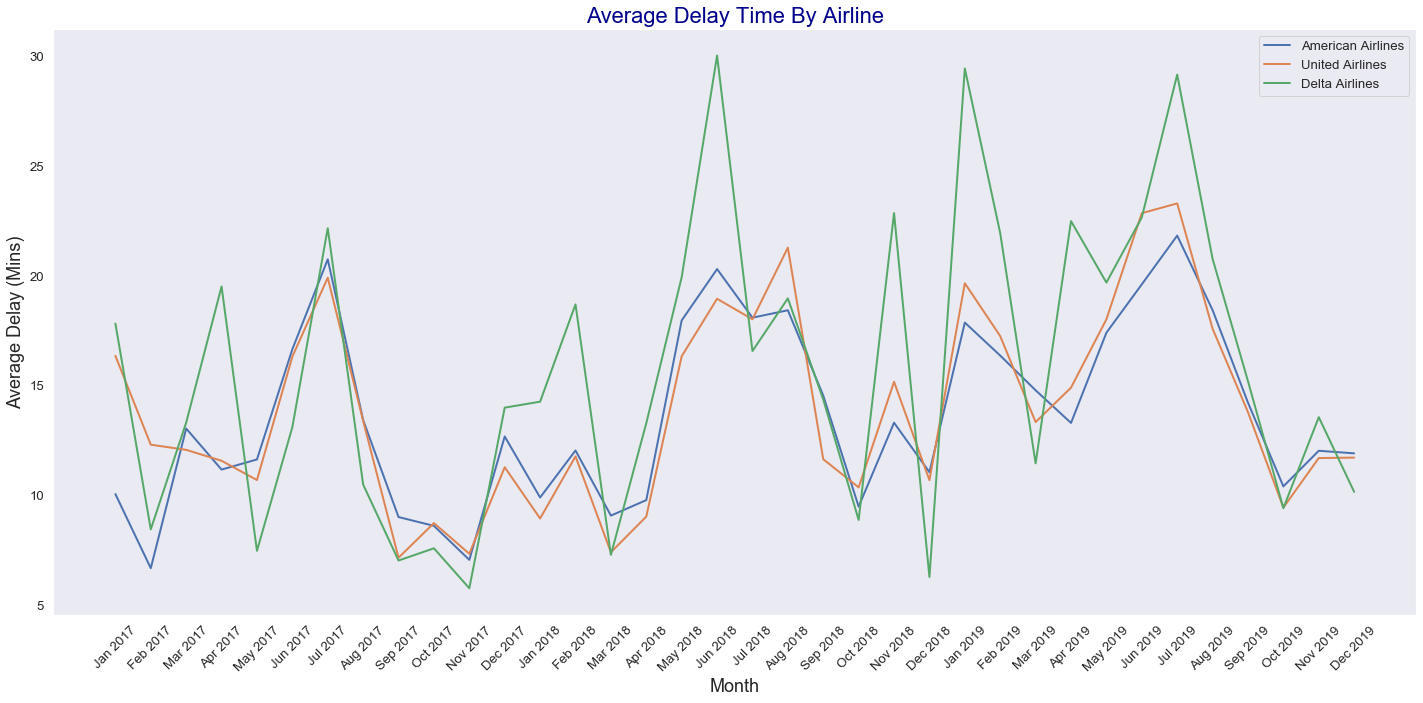

In [30]:
# Average delay time (minutes) by airline for 2017 thru 2019S 
# Format Date to Mont-Year
master_df['Date_formatted'] = master_df['Date'].dt.strftime('%b %Y').astype(str)

# Get Carrier Code mean
master_df_means=master_df.groupby(['Date_formatted', 'Carrier Code']).mean()

master_df_means = master_df_means.reset_index()
master_df_means['date_python'] = master_df_means['Date_formatted'].apply(lambda x: pd.datetime.strptime(x, '%b %Y'))

# Sort dates
master_df_means = master_df_means.sort_values(by='date_python')

plt.figure(figsize=(20,10))
x = master_df_means['Date_formatted'].unique() # Get unique date
y1 = master_df_means[master_df_means['Carrier Code'] == 'AA']['Departure delay (Minutes)'] # American Airlines avg
plt.plot(x, y1, label = "American Airlines",linewidth=2)
y2 = master_df_means[master_df_means['Carrier Code'] == 'UA']['Departure delay (Minutes)'] # United Airlines avg
plt.plot(x, y2, label = "United Airlines", linewidth=2)
y3 = master_df_means[master_df_means['Carrier Code'] == 'DL']['Departure delay (Minutes)'] # Delta Airlines avg
plt.plot(x, y3, label = "Delta Airlines", linewidth=2)

plt.grid(linewidth=0) # To hid grid lines
plt.xlabel('Month', fontsize='18') # Set x label
plt.ylabel('Average Delay (Mins)', fontsize='18') #  Set y label
plt.xticks(rotation=45) # rotate xticks (Month-Year)
plt.title('Average Delay Time By Airline', fontsize='22', color='DarkBlue') # Format title
plt.legend()
#plt.tight_layout()
plt.show

plt.tight_layout() # to fit bbox in to png
plt.savefig("Average Delay Time By Airline.png") # save as png

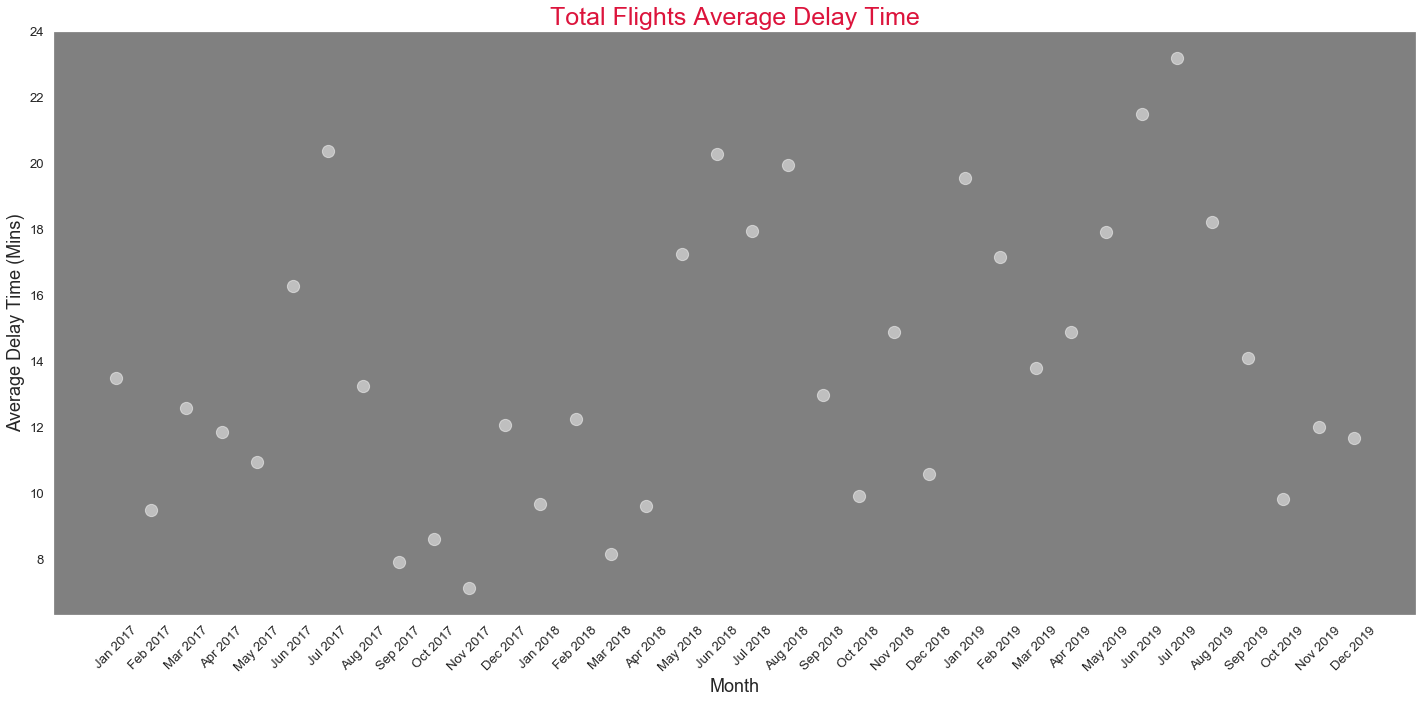

In [31]:
# Average delay time across all airlines
# Format Date to Mont-Year
master_df_means.groupby(["Date_formatted", "Carrier Code"]).mean()["Departure delay (Minutes)"]
# Get Carrier Code mean
master_df_aggregated = master_df.groupby(["Date_formatted"]).mean()
# Reset index
master_df_aggregated = master_df_aggregated.reset_index()
# Format date
master_df_aggregated['date_python'] = master_df_aggregated['Date_formatted'].apply(lambda x: pd.datetime.strptime(x,'%b %Y'))
# Sor Date
master_df_aggregated = master_df_aggregated.sort_values(by='date_python')
# Set plot figure size
plt.figure(figsize=(20,10))

# Assign data columns to x and y 
x = master_df_aggregated['Date_formatted']
y = master_df_aggregated['Departure delay (Minutes)']

# plot scatter and format marker
plt.scatter(x,y,s=150,color='White', marker='o', alpha=0.5)
ax = plt.gca()
ax.set_facecolor('grey') # background color
plt.grid(linewidth=0) # To hid grid lines

#plt.plot(x, y)
plt.xlabel('Month', fontsize='18') # Set x lable
plt.ylabel('Average Delay Time (Mins)', fontsize='18') # Set Y label
plt.xticks(rotation=45) # rotate x label text
plt.title('Total Flights Average Delay Time', fontsize='25', color='crimson') # Format title
# Show plot
plt.show

plt.tight_layout() # to fit bbox in to png
plt.savefig("Total Flights Average Delay Time.png") # save as png